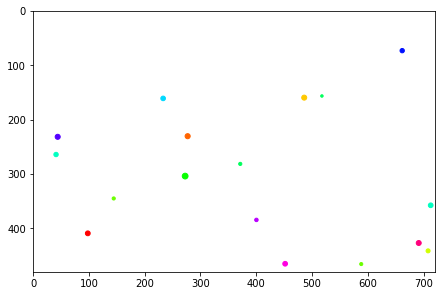

In [16]:
#uses some blood cell tracking data to create a simple matplotlib animation or cell trajectories
#mostly to document/have an example of the process in case it comes up again

from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 100% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
#import pandas as pd #oh dear, what was I thinking
ffmpegPath = 'C:/ffmpeg/bin/ffmpeg.exe'  # to run this (I think? or maybe just to compress I've forgotten) you gotta install/compile ffmpeg. enter the path to the exe here

# choose input/output
fileName = 'cellData_2017-01-25 11-48-08'
dataDir = '../data/'
outputDir = '../output/'

#
outputCodec = 'libx264' #might need to alter codec depending on what you have installed
outputFps = 30          #default playback rate. doesn't affect content really
outputBitrate = 4000    #bits/sec. It's a complicated beast, appropriate valeu will depend on resolution, framerate, complexity of content, etc


#read data (should really use pandas)
cellDataPath = dataDir+fileName+'.csv'
cData = np.genfromtxt(cellDataPath, delimiter=',', usecols=range(8), names=True)

plt.rcParams['animation.ffmpeg_path'] = ffmpegPath
ffWriter = animation.FFMpegWriter(bitrate=4000, codec='libx264', fps=30) #i think u can pass extra_args={'stuff':val, ...} to set params used by ffmpeg (e.g. resolution), but i haven't tried it

#we basically create a plot/figure, then clear+redraw it again for each frame in animation, then join those plots together
fig = plt.figure(figsize=(7.2,4.8))
ax = fig.add_subplot(111)
hsv_map = plt.cm.get_cmap('hsv')

def animate_one_frame(frameNo):
    ax.clear()
    ax.set_xlim(0, 720)
    ax.set_ylim(0, 480)
    ax.invert_yaxis()
    frameRows = (cData[:]['Frame']==frameNo)
    cellColor = hsv_map(((cData[frameRows,]['Cell_ID']*96)%360)/360)
    cellSize  = cData[frameRows]['Area']*20/100
    return ax.scatter(cData[frameRows]['X'], cData[frameRows]['Y'], color=cellColor, s=cellSize)

# # Init only required for blitting to give a clean slate.
#i'm not actually using this or doing anything useful with the init, but it's here
def init_first():
    ax.set_xlim(0, 720)
    ax.set_ylim(0, 480)
    ax.invert_yaxis()
    blitThing = ax.scatter([], [])
    return blitThing,

startFrame = np.min(cData['Frame'])
endFrame = np.max(cData['Frame'])
outputPath = outputDir + fileName + '.avi'

#ani = animation.FuncAnimation(fig, animate, np.arange(startFrame, endFrame), init_func=init, blit=True, repeat=False)
#ani = animation.FuncAnimation(fig, animate_one_frame, np.arange(startFrame, endFrame), repeat=False)
ani = animation.FuncAnimation(fig, func=animate_one_frame, init_func=init_first, frames=np.arange(startFrame, endFrame), repeat=False, save_count=100)
ani.save(outputPath, writer=ffWriter, dpi=100)  #dpi controls the resolution along with figsize: dpi*<figsize>

# plt.show() #i'm sure you can play the animation here, but this isn't it